In [21]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.api as sm


In [4]:
try:
    
    df=pd.read_csv(r"C:\Users\pc\Desktop\New folder\MachineLearningRating_v3.txt", sep="|")
    #df.to_csv("../data/Insurance.csv", index=False)
    print("loaded")
    
except:
    print("try again!")

C:\Users\pc\AppData\Local\Temp\ipykernel_10864\177580061.py:3: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\pc\Desktop\New folder\MachineLearningRating_v3.txt", sep="|")


loaded


In [12]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


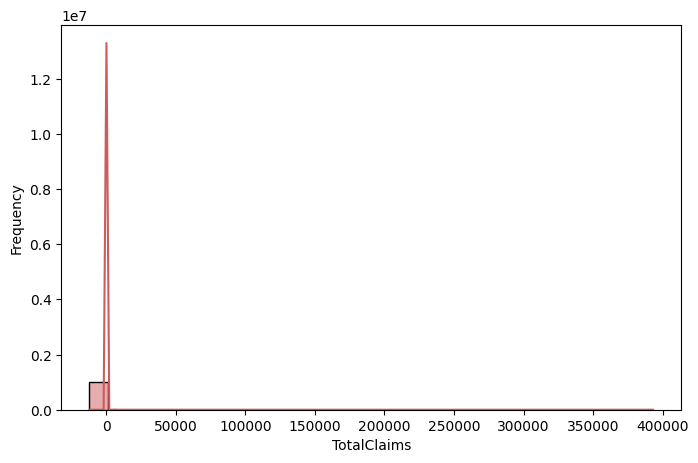

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df[""],kde=True, bins=30, color="indianred")
plt.xlabel("TotalClaims")
plt.ylabel("Frequency")
plt.show()TotalClaims

In [23]:
# Prepare claim_amount groups by bank
groups = [group['TotalClaims'].dropna() for _, group in df.groupby('Bank')]

# Run ANOVA across all banks
f_stat, p_value_anova = stats.f_oneway(*groups)

# Print ANOVA results
print("----- ANOVA Results -----")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value_anova:.4f}")
print("Alpha level: 0.05\n")

# Interpret the result
if p_value_anova < 0.05:
    print("✅ Result: Reject the null hypothesis.")
    print("   ➤ There is a **significant** difference in totalclaim amounts between banks.")
else:
    print("❌ Result: Fail to reject the null hypothesis.")
    print("   ➤ No significant difference in totalclaim amounts between banks.")



----- ANOVA Results -----
F-statistic: 2.7631
P-value: 0.0021
Alpha level: 0.05

✅ Result: Reject the null hypothesis.
   ➤ There is a **significant** difference in totalclaim amounts between banks.


                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
        group1                 group2          meandiff p-adj    lower    upper   reject
----------------------------------------------------------------------------------------
             ABSA Bank           Capitec Bank    8.0049 0.9998   -28.805  44.8148  False
             ABSA Bank    First National Bank    3.9605    1.0   -19.166  27.0871  False
             ABSA Bank         FirstRand Bank  -16.6719    1.0 -327.3305 293.9867  False
             ABSA Bank          Investec Bank   93.3965 0.9944 -196.6966 383.4897  False
             ABSA Bank            Ithala Bank  -64.5473 0.9912 -253.7037 124.6091  False
             ABSA Bank Mercantile Lisbon Bank  -67.3222    1.0 -741.8424 607.1979  False
             ABSA Bank                Nedbank   -5.7868 0.9999  -33.4362  21.8626  False
             ABSA Bank             Old Mutual  -16.6172    1.0 -315.8108 282.5764  False
             ABSA Ban

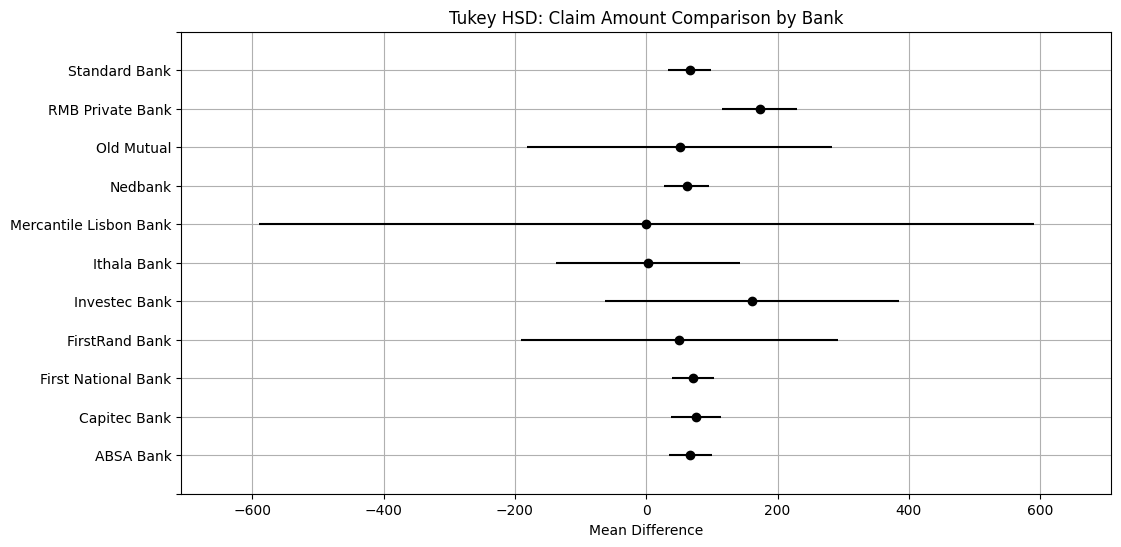

In [22]:


df_clean = df.dropna(subset=['TotalClaims', 'Bank'])

tukey = pairwise_tukeyhsd(endog=df_clean['TotalClaims'],  # numerical column
                          groups=df_clean['Bank'],         # group column
                          alpha=0.05)                      # significance level

# Print results
print(tukey)

# Optional: Plot the results
tukey.plot_simultaneous(figsize=(12, 6))
plt.title("Tukey HSD: Claim Amount Comparison by Bank")
plt.xlabel("Mean Difference")
plt.grid(True)
plt.show()
